# HW 6

1. Translating Sentences:
10 pts
Write a function that translates sentences. The function takes two arguements, the sentence to be translated and tthe targeted language and returns the translated sentence.

In [28]:
!pip install googletrans==4.0.0-rc1
from googletrans import Translator



In [30]:
# Your code here:
translator = Translator()
translated = translator.translate("Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in.", dest = "es")
print(translated.text)


Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir.


Take the following sentence and translate it from English to Spanish.
"Make a career of humanity. Commit yourself to the noble struggle for equal rights. You will make a better person of yourself, a greater nation of your country, and a finer world to live in."

2. Now translate it from Spanish to Chinese
2.5pts

In [32]:
#Your code here:
translated2 = translator.translate("Hacer una carrera de la humanidad.Comprométate con la noble lucha por la igualdad de derechos.Harás una mejor persona de ti mismo, una nación más grande de tu país y un mundo más fino para vivir.", src='es', dest = "zh-cn")
print(translated2.text)

通过为平等权利而努力的人类职业。


3. Now translate it from Chinese back to English.
2.5pts

In [36]:
#Your code here:
translated3 = translator.translate("通过为平等权利而努力的人类职业。", src = "zh-cn", dest = "en")
print(translated3.text)

Human occupations that work hard for equal rights.


4. Now do the same thing with ChatGPT.

2.5pts
Eng to Sp: Sp to Chinese: Chinese to Eng:



5. Describe the difference in quality and features of output:
2.5pts

Your answer here: When I asked ChatGPT to translate the given quote from english to spanish, from spanish to chinese, then from chinese to english, it provided the following:

"Devote your life to humanity. Engage in the noble struggle for equal rights. You will become a better person, your country will become a greater nation, and the world will become a better place."

When I translated with the googletrans library, I ended up with a completed english translation of: "Human occupations that work hard for equal rights." It seems as if the googletrans library translated the main message of the text when translating from spanish to chinese without keeping the structure and without translating the text word for word. 

The ChatGPT version seems to have done a better job in translating the entirety of the message. I also ran the translation in ChatGPT with refreshed pages at every translation to rule out any effect of history/background information from previous translations on the last translation, and resulted with similar phrases. 


 ## 7.  The Trump Card
Here is a link to a speech made by former President Trump on January 6: https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial. Not all of the text is his speech. Some of the text is the analysis. Please extract Donald Trump's speech only, remove stopwords and perform a word frequency distribution and visualize it.
20pts

[('going', 73), ('want', 65), ('people', 53), ('get', 47), ('got', 41), ('go', 36), ('ballots', 35), ('it.', 34), ('like', 31), ('know,', 28), ('never', 27), ('know', 27), ('So', 26), ("we're", 25), ('think', 25), ("that's", 24), ('one', 24), ('votes', 24), ('state', 24), ("It's", 23)]


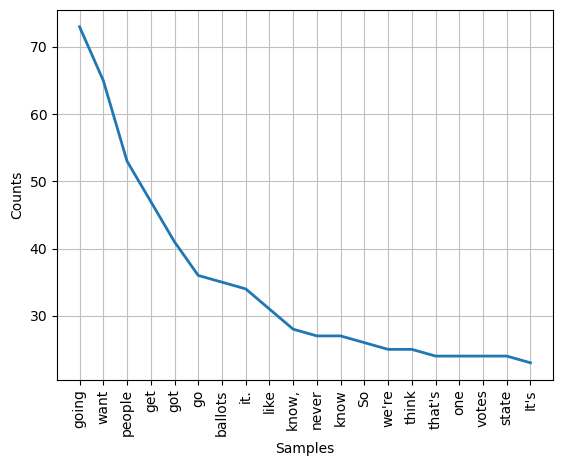

Axes(0.125,0.11;0.775x0.77)


In [38]:
#Your code here:
import requests 
from bs4 import BeautifulSoup
!pip install nltk
#nltk.download()
import nltk

base_url = "https://www.npr.org/2021/02/10/966396848/read-trumps-jan-6-speech-a-key-part-of-impeachment-trial"
r = requests.get(base_url)
soup = BeautifulSoup(r.text, "html.parser")
divider = soup.find('div',class_='hr')
paragraphs = divider.find_all_next()

trump_speech = []
for paragraph in paragraphs:
    if paragraph.name== 'p':
        trump_speech.append(paragraph.get_text())

speech_text = " /n/n ".join(trump_speech)
#print(trump_speech)

# removing stopwords
from nltk.probability import FreqDist
from nltk.corpus import stopwords 
stopwords = nltk.corpus.stopwords.words("english")

import matplotlib.pyplot as plt 

new_stops = [',', "I", ".", ";", "-","?", "The", "If", "It", "--","would",'"',"'", "us", "/n/n", "We", ":", "And", "They", "But", "You"]
stopwords.extend(new_stops)

words = speech_text.split()


cleaned_doc = []
for word in words:
    if not word in stopwords: 
        cleaned_doc.append(word) 

#print(cleaned_doc)

#frequency distribution
cleaned_doc_dist = FreqDist(cleaned_doc)
x = cleaned_doc_dist.most_common(20)
print(x)

#graphing frequency distribution 
print(cleaned_doc_dist.plot(20))



8. Here is a link to a github repo that contains Donald Trump's speeches: https://github.com/ryanmcdermott/trump-speeches/blob/master/speeches.txt
   
What are the 10 most common things Donald Trump "loves?"
10pts

In [ ]:
#Your code and answer here:
import requests #import library called request
from collections import Counter #use the counter function
import string


new_stops = [',', "I", ".", ";", "-","?", "The", "If", "It", "--","would",'"',"'", "us", "/n/n", "We", ":", "And", "They", "But", "You"]
stopwords.extend(new_stops)

unsure_words = ["it", "this", "them", "their", "that"]
stopwords.extend(unsure_words)

with open('speeches.txt', 'r') as file:
    speeches = file.read()
#print(text)

remove_punc = str.maketrans('', '', string.punctuation)
cleaned_text = speeches.translate(remove_punc)

# Step 2: S plit the cleaned text into words
words = cleaned_text.split()

cleaned_speech = []
for word in words:
    if not word in stopwords: 
        cleaned_speech.append(word) 

#print(cleaned_speech)

love_words = []
for word in range(len(cleaned_speech) - 1): #for each word in the loop, stops before the last word
    if cleaned_speech[word].lower() in ['love', 'loves']: # if the word in lowercase is love or loves
        love_words.append(cleaned_speech[word + 1]) #append the word that follows it

love_counter = Counter(love_words)

top_10_loves = love_counter.most_common(10)
print(top_10_loves)



9. Which are the top 5 countries Trump mentions in his speeches, besides America or the United States of America?
10pts

In [46]:
#Your code and answer here:

#Your code and answer here:
import requests #import library called request
from collections import Counter #use the counter function
import string


new_stops = [',', "I", ".", ";", "-","?", "The", "If", "It", "--","would",'"',"'", "us", "/n/n", "We", ":", "And", "They", "But", "You"]
stopwords.extend(new_stops)

with open('speeches.txt', 'r') as file:
    speeches = file.read()
#print(text)

remove_punc = str.maketrans('', '', string.punctuation)
cleaned_text = speeches.translate(remove_punc)

# Step 2: S plit the cleaned text into words
words = cleaned_text.split()

cleaned_speech = []
for word in words:
    if not word in stopwords: 
        cleaned_speech.append(word)

countries = [
    'China', 'Russia', 'Mexico', 'Canada', 'Germany', 'France', 'Japan', 'India', 'South Korea', 
    'North Korea', 'Iran', 'Iraq', 'Syria', 'Israel', 'Saudi Arabia', 'Turkey', 'Afghanistan', 
    'Venezuela', 'Cuba', 'Brazil', 'United Kingdom', 'Australia', 'Pakistan', 'Ukraine',
    'Argentina', 'Bangladesh', 'Belgium', 'Bolivia', 'Cambodia', 'Chile', 'Colombia', 'Denmark', 
    'Ecuador', 'Egypt', 'El Salvador', 'Ethiopia', 'Finland', 'Greece', 'Guatemala', 'Haiti', 
    'Honduras', 'Hungary', 'Indonesia', 'Ireland', 'Italy', 'Jamaica', 'Jordan', 'Kenya', 
    'Kuwait', 'Lebanon', 'Libya', 'Malaysia', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 
    'New Zealand', 'Nigeria', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Peru', 'Philippines', 
    'Poland', 'Portugal', 'Qatar', 'Romania', 'South Africa', 'Spain', 'Sri Lanka', 'Sweden', 
    'Switzerland', 'Taiwan', 'Thailand', 'Tunisia', 'Uganda', 'Uruguay', 'Vietnam', 'Zambia', 
    'Zimbabwe', 'Somalia', 'Sudan', 'South Sudan', 'Yemen', 'Luxembourg', 'Latvia', 'Lithuania', 
    'Estonia', 'Iceland', 'Serbia', 'Montenegro', 'Macedonia', 'Albania', 'Slovenia', 'Slovakia', 
    'Czech Republic', 'Croatia', 'Bosnia', 'Herzegovina', 'Malta', 'Cyprus', 'Monaco', 'Liechtenstein'
]
# filter for country names 

countries_mentioned = []

# Iterate through the cleaned text to find mentioned countries, ignoring America and the United States
for word in cleaned_speech:
    if word in countries:
        countries_mentioned.append(word)

country_counter = Counter(countries_mentioned)

t5_countries = country_counter.most_common(5)

print(t5_countries)



[('China', 193), ('Mexico', 149), ('Iran', 83), ('Israel', 80), ('Iraq', 69)]



 In class we talked about tokenizing sentences into words, or parsing texts by single words(unigrams), or two words(bigrams). But you can also tokenize by sentences. Here is some sample code:


In [48]:
import nltk
from nltk.tokenize import sent_tokenize

text = "This is the first sentence. This is the second sentence."
sentences = sent_tokenize(text)

print(sentences)

['This is the first sentence.', 'This is the second sentence.']


In class we talked about final projects and I suggested one of the interesting uses of this technology is to consider conventional thinking on some subject and use Python to more comprehensively and critically evaluate that thinking. We touched on "political thinking" as a good place to apply Python language analyses. In political speeches, certain sentences or phrases are repeated to show a candidates coaching, focus or in marketing terms, "messaging." 

Here is an analyis from https://www.vox.com/2016/8/18/12423688/donald-trump-speech-style-explained-by-linguists of the "salesman" techniques that Trump uses: "Trump’s speeches can be appealing because he uses a lot of salesmen’s tricks. Lakoff, for his part, has an explanation for why Trump’s style of speaking is so appealing to many. Many of Trump’s most famous catchphrases are actually versions of time-tested speech mechanisms that salesmen use. They’re powerful because they help shape our unconscious. Take, for example, Trump’s frequent use of "Many people are saying..." or "Believe me" — often right after saying something that is baseless or untrue. This tends to sound more trustworthy to listeners than just outright stating the baseless claim, since Trump implies that he has direct experience with what he’s talking about. At a base level, Lakoff argues, people are more inclined to believe something that seems to have been shared. Or when Trump keeps calling Clinton "crooked," or keeps referring to terrorists as "radical Muslims," he’s strengthening the association through repetition. He also calls his supporters "folks," to show he is one of them (though many politicians employ this trick). Trump doesn’t repeat phrases and adjectives because he is stalling for time, Liberman says; for the most part, he’s providing emphasis and strengthening the association. These are normal techniques, particularly in conversational speech. "Is he reading cognitive science? No. He has 50 years of experience as a salesman who doesn’t care who he is selling to," Lakoff says. On this account, Trump uses similar methods in his QVC-style pitch of steaks and vodka as when he talks about his plan to stop ISIS."He has been doing this for a very long time as a salesman — that’s what he is best at," Lakoff says."  
*This is not to say I agree or disagree with this analysis.*  This is just one example of what we touched on in class. 

10. Perform a frequency analysis that provides evidence for or against the assertion made in the Vox article.
Consider tokenizing by unigram (one word), bigram(two words), trigram(three words) or more, or whole sentences or multiple approaches that help us understand the most common Trump linguistic characteristcs. Use your evidence and words to describe what you found. This is a fairly open ask. Don't just execute code. Tell me and show me something interesting!
20pts

[('–', 1300), ('people', 1205), ('don’t', 842), ('I’m', 769), ('So', 687), ('great', 617), ('it’s', 594), ('we’re', 549), ('It’s', 509), ('country', 496), ('We’re', 433), ('they’re', 422), ('money', 375), ('right', 361), ('lot', 360), ('good', 334), ('mean', 315), ('way', 309), ('that’s', 304), ('look', 294)]


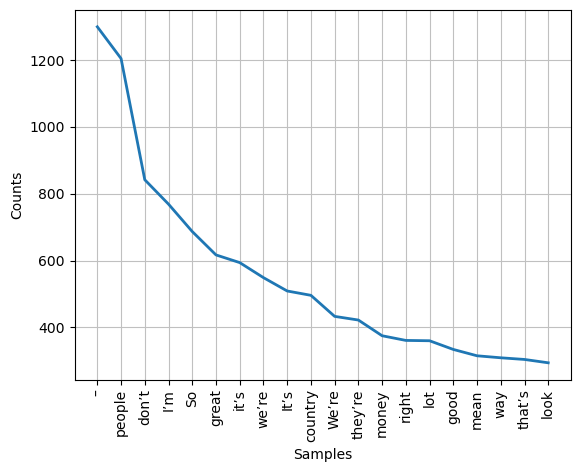

Axes(0.125,0.11;0.775x0.77)
[(('United', 'States'), 114), (('GOING', 'TO'), 114), (('Hillary', 'Clinton'), 80), (('I’ll', 'tell'), 63), (('WERE', 'GOING'), 63), (('years', 'ago'), 61), (('WE', 'HAVE'), 55), (('lot', 'money'), 48), (('people', 'don’t'), 48), (('lot', 'people'), 45), (('Thank', 'Thank'), 45), (('what’s', 'happening'), 44), (('New', 'Hampshire'), 44), (('people', '–'), 44), (('Middle', 'East'), 43), (('little', 'bit'), 42), (('America', 'great'), 41), (('New', 'York'), 40), (('So', 'we’re'), 39), (('build', 'wall'), 38)]


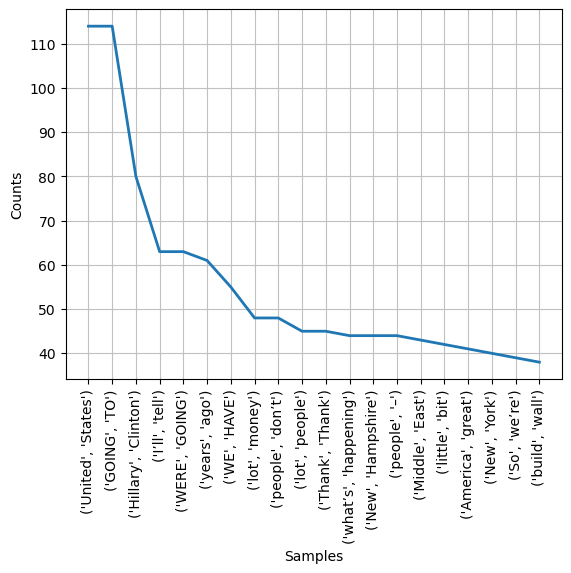

Axes(0.125,0.11;0.775x0.77)
[(('WERE', 'GOING', 'TO'), 57), (('GOING', 'TO', 'BE'), 27), (('Thank', 'Thank', 'Thank'), 21), (('WE', 'HAVE', 'TO'), 19), (('don’t', 'win', 'anymore'), 14), (('A', 'LOT', 'OF'), 14), (('WE', 'HAVE', 'A'), 14), (('Thank', 'everybody', 'Thank'), 12), (('New', 'York', 'Times'), 11), (('We’re', 'build', 'wall'), 11), (('great', 'trade', 'deals'), 11), (('owe', '19', 'trillion'), 11), (('TAKE', 'CARE', 'OF'), 11), (('ALL', 'OVER', 'THE'), 11), (('ARE', 'GOING', 'TO'), 11), (('Thank', 'Thank', 'everybody'), 10), (('destabilize', 'Middle', 'East'), 10), (('A', 'lot', 'people'), 10), (('can’t', 'let', 'happen'), 10), (('America', 'First', 'means'), 10)]


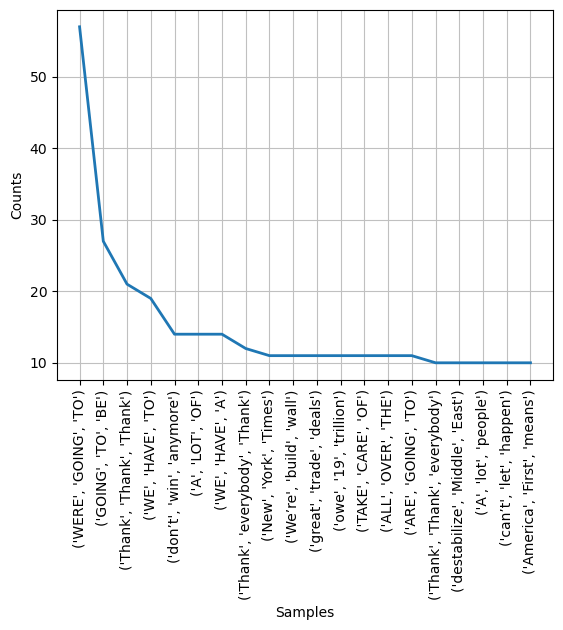

Axes(0.125,0.11;0.775x0.77)


In [50]:
#Your code and response here:
from nltk import trigrams
#nltk.download('punkt')  # Ensure you have the punkt tokenizer downloaded
from nltk.tokenize import sent_tokenize

new_stops = [',', "I", ".", ";", "-","—", "?", "The", "If", "It","I'm", "--","would",'"',"'", "us", "/n/n", "We", ":", "And", "They", "But"]
stopwords.extend(new_stops)

more_stopwords = [
    # Articles and Determiners
    "a", "an", "the", "this", "that", "these", "those", "all", "any", "both", "each", "every", "either", 
    "neither", "some", "such", "much", "several", "few", "many", "other", "another", "one", "two", 
    "three", "four", "five", "first", "second", "third", "last", "next", "own", "same", "another", "enough",

    # Pronouns
     "he", "him", "his", "himself", "she", 
    "her", "hers", "herself", "it", "its", "itself", "ours", "they", 
    "them", "their", "theirs", "themselves", "who", "whom", "which", "whose", "what", "where", "when", 
    "why", "how", "whoever", "whomever", "whichever", "whenever", "whatever", "wherever", "however", 

    # Auxiliary Verbs
    "am", "is", "are", "was", "were", "be", "being", "been", "have", "has", "had", "having", "do", 
    "does", "did", "doing", "can", "could", "shall", "should", "will", "would", "may", "might", 
    "must", "ought", "need", "dare", 

    # Common Verbs (Non-substantial in general speech)
    "get", "got", "go", "goes", "going", "went", "make", "made", "do", "does", "did", "done", "see", 
    "saw", "seen", "say", "says", "said", "take", "took", "taken", "give", "gave", "given", "come", 
    "came", "become", "became", "use", "used", "know", "knew", "known", "think", "thought", "need", 
    "needed", "want", "wanted",  

    # Prepositions and Conjunctions
    "about", "across", "after", "against", "along", "among", "around", "as", "at", "before", 
    "behind", "below", "beneath", "beside", "between", "beyond", "but", "by", "concerning", 
    "despite", "down", "during", "except", "following", "for", "from", "in", "inside", "into", "like", 
    "near", "of", "off", "on", "onto", "out", "outside", "over", "regarding", "since", 
    "through", "to", "toward", "under", "until", "up", "upon", "with", "within", 
    "without", "and", "or", "nor", "either", "neither", "because", "though", "although", "if", 
    "unless", "while", "until", "when", "where", "why", "how", "so",

    # Common Adverbs
    "again", "almost", "already", "always", "also", "anyway", "anywhere", "back", "before", "best", 
    "better", "but", "ever", "even", "far", "further", "here", "just", "later", "least", "less", 
    "more", "most", "much", "now", "often", "once", "only", "over", "perhaps", "quite", "rather", 
    "really", "so", "still", "then", "there", "therefore", "thus", "too", "under", "very", "well", 
    "where", "whether", "why",

    # Interjections
    "oh", "wow", "hey", "oops", "ouch", "uh", "ah", "hmm", "ugh", "ohh", "yeah", "nah",
]
stopwords.extend(more_stopwords)

with open('speeches.txt', 'r') as file:
    speeches = file.read()
#print(text)

remove_punc = str.maketrans('', '', string.punctuation)
cleaned_text = speeches.translate(remove_punc)

#split the cleaned text into words
words = cleaned_text.split()

cleaned_speech = []
for word in words:
    if not word in stopwords: 
        cleaned_speech.append(word) 

#print(cleaned_speech)

cleaned_speech_dist = FreqDist(cleaned_speech)

most_common_words_1 = cleaned_speech_dist.most_common(20)

print(most_common_words_1)
print(cleaned_speech_dist.plot(20))


#bigram 

bi = list(nltk.bigrams(cleaned_speech))
bi_dist = FreqDist(bi)
y = bi_dist.most_common(20)
print(y)
print(bi_dist.plot(20))

#trigram 

tri = list(trigrams(cleaned_speech))
tri_dist = FreqDist(tri)
z = tri_dist.most_common(20)
print(z)
print(tri_dist.plot(20))



In [52]:
#tokenizing sentences 

sentences = sent_tokenize(speeches)

sentence_counts = Counter(sentences)

most_common_sentences = sentence_counts.most_common(10)

print(most_common_sentences)

#?
print("")

question_sentences = [sentence for sentence in sentences if sentence.strip().endswith('?')]

question_counts = Counter(question_sentences)

most_common_questions = question_counts.most_common(10)
print(most_common_questions)

[('Okay?', 117), ('Right?', 102), ('Thank you.', 64), ('Believe me.', 27), ('It’s true.', 24), ('Think of it.', 23), ('I don’t know.', 21), ('And you know what?', 17), ('Thank you very much.', 17), ('But you know what?', 14)]

[('Okay?', 117), ('Right?', 102), ('And you know what?', 17), ('But you know what?', 14), ('Can you believe it?', 10), ('You know?', 10), ('All right?', 7), ('OK?', 6), ('You know why?', 6), ('Remember?', 6)]


UNIGRAM -------------------------------------------------------------------------------

--> "People" (1205):

The frequent use of "people" shows Trump's emphasis on addressing problems or issues that have to do with ordinary citizens. By using the word repetitively, he is positioning himself as a representative of the general population even though it is highly unlikely for him to experiecne the everyday problems of the average American. 

--> contractions 

The use of contractions like "I'm", "We're", "Don't" creates a very conversational tone. In many of Trumps speeches, especially those to the public, he speaks in an informal manner that makes what he wants to say more relatable. 
Additionally, the use of collective pronouns like "we" and "we're", he creates an environment of unity, aligning himself with the people.  

--> "money" and "country" 

Trump's frequent use of the words money and country could possibly reflect policy issues that he is passionate about. These uses could highlight national interests and his work to strengthen the American economy. 

BIGRAM-------------------------------------------------------------------------------

--> "United States" and "America" x "great"

The frequent use of "United States" and "America" & "Great" reflects Trump's patriotism 

--> "Hillary Clinton" 

He also frequently mentions his opponent, Hillary Clinton, who ran against him as the democratic nominee in 2016 

--> Other pairs

pairs like "Going to" and "We're going" probably indicate Trump's plans for the future. 
"Build, wall" and "Middle East" point to policy or actions that Trump has to plans to initiate. 

TRIGRAM -------------------------------------------------------------------------------

Similar to bigrams, a couple of trios include "We're, going, to", "we're, build, wall", "destabilize, Middle, East", "America, first, means" and "owe, 19, trillion" 

Trigrams do a better job at providing a step more of information than bigrams do. However, bigrams offer more interesting insights than trigrams do. 

SENTENCES -----------------------------------------------------------------------------

--> "Okay?", "Right?"

Trump uses questions to engage with his audience as he involves listeners and encourages agreement. 

--> "Believe me.", "It's true"

His uses of statements of assurance seeks to build trust and to make the claims that he had just stated, which could be absolutely true, more credible. 

--> "Thank you" & "Thank you very much" 

Shows his appreciation for his support 

QUESTIONS ----------------------------------------------------------------------------

After seeing how many most common sentences were questions, I thought it would be interesting to see which questions he asked the most. 

--> "Okay?", "Right?" 

Through these statements, it is likely that Trump is seeking confirmation 

--> "And you know what?", "But you know what?" 

Building anticipation. 

--> "Can you believe it?", "you know why?"

highlights how outrageous or problematic his previous statement was 

--> "Remember?"

encouraging reflection, strengthening collective memory. 



## 6. Mired in Mango Madness ##
20pts

Congratulations! In your last semester at Yale, you got a job at the World Bank ! 

Your first assignment is to address the dearth of good data in Mali on Mango quality and production. Your boss put you on a plane to Mali during the harvest season. You are excited, not only because your boss is annoying and wears too much cologne, but international travel is part of the excitement of an international job. You are excited to see the Great Mosque of Djenne, to watch the sunset from the Bandiagara Cliffs, and to dance the night away to  at Le Byblos. Oh yeah, there is the work too. After a particular "rough" night you meet with your colleagues at the office.  You thought you'd be able to just get by making eye contact and nodding while they did most of the work. After all, you are new to the role. No such luck. Your colleagues are thrilled that you can solve their problems by creating an automated call center. Their exact words are, "The Harvard grad ended up quitting, I'm glad we have someone from Yale here to make things right."

You are given an office and a computer. You may have slightly overstated your Python coding skills to get the job, but too late now. They ask if you mind if they watch you code. You tell them that you prefer to work alone, although ask them to lunch later to soften the push back. After the initial panic and hangover subsides you think back to your days in intermediate python at Yale, the encouraging words of your caring but demanding prof,  and then a light flashes in your mind and you think, "I got this." 

You've been tasked with the goal of setting up an automated call center to get data on current market prices, production and quality. There are growers who are both collectives who report these factors, and also smaller growers! Unfortunately, some of these are incentivized to underreport production and prices under the assumption that they will receive more foreign aid. Not all of them though! It's estimated that 10-20% of the self-reporting is innacurate. Callers call the center. Words are processed from speech to text. Text is processed, converted back to speech and then communicated to the caller. 

There are a few challenges you face: 
1. The speech to text algo was trained on French, but most of the farmers who call in speak Bambara. You must translate from Bambara to French, and then French to English, because your boss doesn't speak French and wants things in English and is completely unreasonable.
2. Sometimes the call just ends, sometimes words are sporadic, sometimes the algo. confuses the word "child" and the word "mango"
3. The call in number was once the number for the infant health hotline. People still use the number to try to get immediate emergency care for their infant. Their calls must be redirected or children could die and it would be your fault, not to mention an international incident.
4. The call number is often called by fans and musicians who are given the number by directory assistance because there is a music production company called Mango Mali, a fledgling world music group that markets music from Mali to France.
5. You must try to identify who is lying about their crop yield quality and prices.


**YOUR MISSION**

Write code that accepts the number as an input and then collects user input(in Bambara), translates it to French, and then outputs the data to a csv file in English. Please make sure you write code that addresses the challenges above (1-5). 
Create use cases to demonstrate that your code works and that you have addressed the basic use case, and that you have addressed challenges 1-5.

In [54]:
#Your code here:


## NOTES 

# the number inputs are universal 
#Average: Dɔgɔdɔgɔ
#Good: Dɔrɔn
#Superior: Kɛrɛ
# absolutely mangolisious --> Sisan niɲɔgɔnya mangora

#MANGO DATA SERVICES NUMBER --> 6842580600

import csv
import random 

from googletrans import Translator  

translator = Translator()

def bambara_to_french(text):
    return translator.translate(text, src = 'bm', dest = "fr").text 

def french_to_english(text):
    return translator.translate(text, src = 'fr', dest = "en").text 

# def classifying_type_call(text):
#     if "infant" in text or "health" in text or "baby" in text: 
#         return "emergency"
#     elif "music" in text or "Mango Mali" in text or "musician" in text:
#         return "mango_mali"
#     elif "mango" in text or "mangos" in text:
#         return "
#     else:
#         return "market_reports"

def save_to_csv(phone_number, report):
    with open("market_data.csv", mode = "a", newline = "") as file:
        writer = csv.writer(file)
        writer.writerow([phone_number, report["yield"], report["price"], report["quality"]])

def detect_inaccuracy(yield_value, price_value):
    if random.random() < 0.20:
        return True
    return False 

def ask_for_data():

    while True: 
        text = input("What crop would you like to report information on?").lower()
        if "infant" in text or "health" in text or "baby" in text: 
            print("EMERGENCY ---- DIAL 911")
            #redirect call 
        elif "music" in text or "mango mali" in text or "musician" in text:
            print("This is not Mango Mali. Please disconnect") 
        elif "mango" in text or "mangos" in text or "child" in text: 
            break
        else:
            print("Invalid crop. We only want reports on mangos. Please report on mangos or hang up")
            
    while True: 
        production_yield = input("What is the production yield of mangos? (e.g., 500 kg): ")
        if production_yield.isdigit():
            print(f"Production yield: {production_yield} kg")
            break
        else:
            print("invalid input. Please enter a valid number in kilograms for production yield.") 

    while True: 
        price = input("What is the price you are selling your mangos for? (e.g.,100 CFA per kg): ")
        if price.isdigit():
            print(f"Price: {price} CFA per kg")
            break
        else:
            print("invalid input. Please enter a valid number in CFA per kg for price.") 

    qualities = ["dɔgɔdɔgɔ", "dɔrɔn", "kɛrɛ", "Sisan niɲɔgɔnya mangora"]
    while True:
        quality = input("What is the quality of the mangos you sell? (choose: Dɔgɔdɔgɔ, Dɔrɔn, Kɛrɛ, or Sisan niɲɔgɔnya mangora): ").lower()
        if quality in qualities:
            print("Thank you for your reporting! Have a great rest of your day!")
            break
        else: 
            print(f"Invalid input. Please choose from: {', '.join(qualities)}.")

    print(f"Final report:")
    print(f"Production Yield: {production_yield} kg")
    print(f"Price: {price} CFA per kg")
    print(f"Quality: {quality}")

    return {
        "crop": text,
        "yield": production_yield,
        "price": price,
        "quality": quality
    }
    

def call(): 
    phone_number = input("Please enter the phone number you would like to call: ")
    if phone_number == "6842580600":
        print("You are now calling Mango data services.") 

        data = ask_for_data()

        inaccuracy = detect_inaccuracy(data["yield"], data["price"])

        report = {
            "yield": data["yield"],
            "price": data["price"],
            "quality": data["quality"],
            "inaccuracy_flag": inaccuracy
        }            
            
        # yield_french = bambara_to_french(data["yield"])
        # price_french = bambara_to_french(data["price"])
        # quality_french = bambara_to_french(data["quality"])    

        # yield_english = french_to_english(yield_french)
        # price_english = french_to_english(price_french)
        # quality_english = french_to_english(quality_french)


        save_to_csv(phone_number, report)
        return {"status": "report_saved"}

    else:
        print("Invalid phone number. Access denied.")
        return {"status": "access_denied"}

  

call()


Please enter the phone number you would like to call:  6842580600


You are now calling Mango data services.


What crop would you like to report information on? infant


EMERGENCY ---- DIAL 911


What crop would you like to report information on? music


This is not Mango Mali. Please disconnect


What crop would you like to report information on? MANgos
What is the production yield of mangos? (e.g., 500 kg):  33


Production yield: 33 kg


What is the price you are selling your mangos for? (e.g.,100 CFA per kg):  59


Price: 59 CFA per kg


What is the quality of the mangos you sell? (choose: Dɔgɔdɔgɔ, Dɔrɔn, Kɛrɛ, or Sisan niɲɔgɔnya mangora):  Dɔrɔn


Thank you for your reporting! Have a great rest of your day!
Final report:
Production Yield: 33 kg
Price: 59 CFA per kg
Quality: dɔrɔn


{'status': 'report_saved'}

In [ ]:

## TAKE 1, please don't grade 



#Your code here:

import csv
import random 

from googletrans import Translator  

translator = Translator()

def bambara_to_french(text):
    return translator.translate(text, src = 'bm', dest = "fr").text 

def french_to_english(text):
    return translator.translate(text, src = 'fr', dest = "en").text 

def classifying_type_call(text):
    if "infant" in text or "health" in text or "baby" in text: 
        return "emergency"
    elif "music" in text or "Mango Mali" in text or "musician" in text:
        return "mango_mali"
    else:
        return "market_reports"

def check_mango_child(text):
    if "child" in text:
        text = text.replace("child", "mango")
    else: 
        pass
    return text 

def save_to_scv(phone_number, report):
    with open("market_data.csv", mode = "a", newline = " ") as file:
        write.csv.writer(file)
        write.writerow([phone_number, report["yield"], report["price"], report["quality"]])

def ask_for_data():
    print("Please report your crop information.")
    check_for_mango = input("What crop would you like to report information on?")
        if check_for_mango = "mango" or "mangos"
        
    production_yield = input("What is the production yield of mangos? (e.g., 500 kg): ")
    
    price = input("What is the price you are selling your mangos for? (e.g., 100 CFA per kg): ")
    
    quality = input("What is the quality of the mangos you sell? (e.g., good, average, poor): ")
    
    return {
        "yield": production_yield,
        "price": price,
        "quality": quality
    }

def call(): 
    phone_number = input("Please enter the phone number you would like to call: ")
    if phone_number == "6842580600":
        print("You are now calling Mango data services.") 

        data = ask_for_data()

        yield_french = translate_bambara_to_french(data["yield"])
        price_french = translate_bambara_to_french(data["price"])
        quality_french = translate_bambara_to_french(data["quality"])    

        yield_english = translate_french_to_english(yield_french)
        price_english = translate_french_to_english(price_french)
        quality_english = translate_french_to_english(quality_french)

        report = {
            "crop": crop_english,
            "yield": yield_english,
            "price": price_english,
            "quality": quality_english
        }

        save_to_csv(phone_number, report)
        return {"status": "report_saved"}

    else:
        print("Invalid phone number. Access denied.")
        return {"status": "access_denied"}

call()
